### Hierarchical Clustering

https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
%matplotlib inline
# np.set_printoptions(precision=5, suppress=True)

(15, 2)


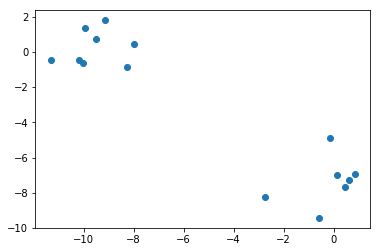

In [2]:
# generate two clusters: a with 100 points, b with 50:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_features=2, centers=2,n_samples=15,random_state=9)

print X.shape  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

Linkage:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage

An (n−1) by 4 matrix Z is returned. At the i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster n+i. A cluster with an index less than nn corresponds to one of the nn original observations. The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.

### Single Linkage

In [5]:
Z = linkage(X, 'single')
Z[:2]

array([[ 6.        ,  8.        ,  0.21629217,  2.        ],
       [ 4.        ,  9.        ,  0.41853595,  2.        ]])

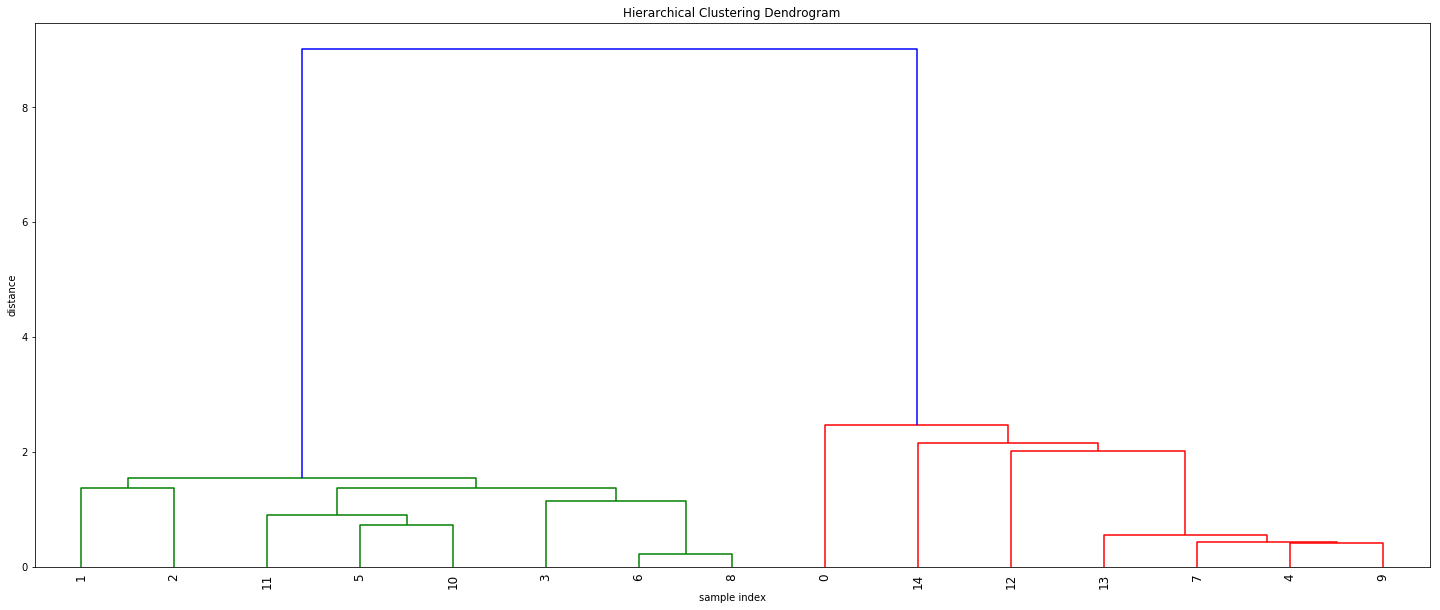

In [4]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
)
plt.show()

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html

### Practice question one:
Try complete and maybe other linkage metrics(if you have time). And compare your results with the single linkage. Do these two algorithms give you same result?

### Deciding the number of clusters:

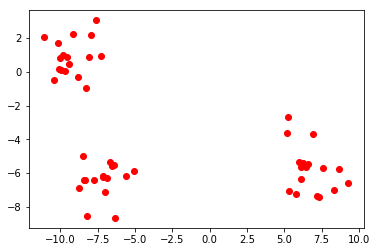

In [8]:
X, y = make_blobs(n_features=2, centers=3,n_samples=50,random_state=9999)
plt.scatter(X[:,0],X[:,1],c="r")
plt.show()

In [10]:
Z = linkage(X, 'single')
Z[:3]

array([[  3.        ,  42.        ,   0.05433068,   2.        ],
       [ 36.        ,  41.        ,   0.06942109,   2.        ],
       [ 38.        ,  47.        ,   0.13451214,   2.        ]])

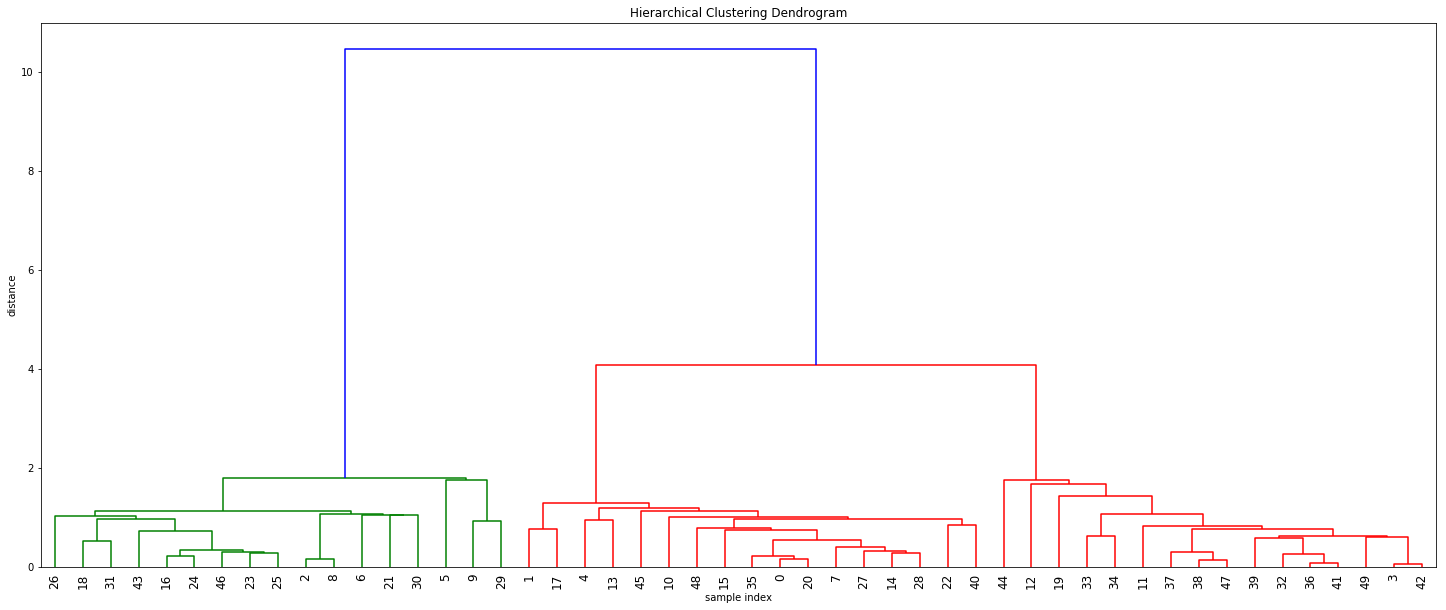

In [11]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
)
plt.show()

### Form Clusters:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html#scipy.cluster.hierarchy.fcluster

#### By distance or cluster number. 

In [194]:
from scipy.cluster.hierarchy import fcluster
fcluster(Z, t=2.5, criterion='distance')

array([2, 2, 1, 3, 2, 1, 1, 2, 1, 1, 2, 3, 3, 2, 2, 2, 1, 2, 1, 3, 2, 1, 2,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 1, 3, 2,
       1, 3, 2, 3], dtype=int32)

In [195]:
fcluster(Z, 3, criterion='maxclust')

array([2, 2, 1, 3, 2, 1, 1, 2, 1, 1, 2, 3, 3, 2, 2, 2, 1, 2, 1, 3, 2, 1, 2,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 1, 3, 2,
       1, 3, 2, 3], dtype=int32)

### By Eyes
#### Visulization 

In [24]:
def fancy_dendrogram(*args, **kwargs): # This code is resued from the blog.
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata


def distance_thr(Z,d,p): 
    plt.figure(figsize=(10,6))
    fancy_dendrogram(
        Z,
        truncate_mode='lastp',
        p=p,
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,
        annotate_above=10,
        max_d=d,
    )
    plt.show()

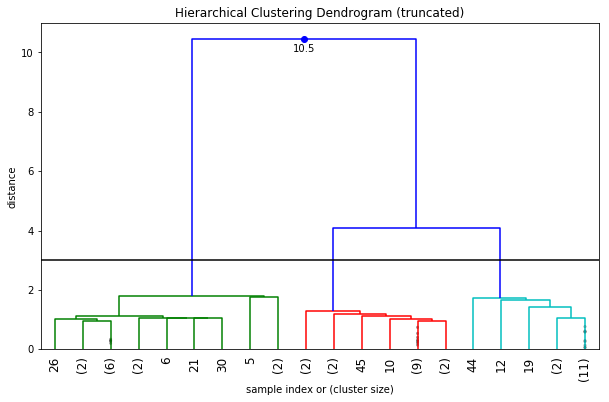

In [25]:
distance_thr(Z,3,p=20)

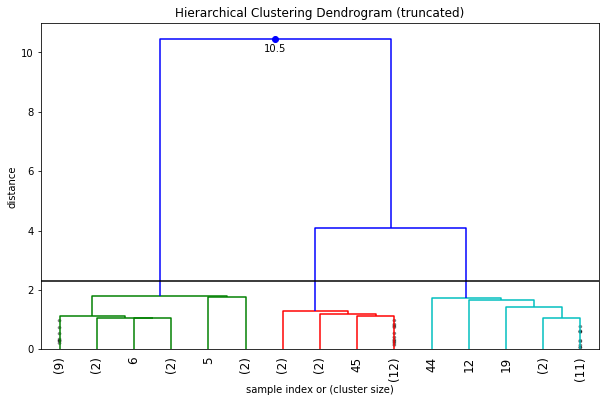

In [26]:
distance_thr(Z,2.3,p=15)

### Criteria for determining the number of clusters.

https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set


### Practice Two. 
#### Silhouette Coefficient
http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

Please fullfill the the XXXXX part.

In [22]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

#Choose a range(list) of clusters you would like to try:
range_n_clusters = XXXXX

for n_clusters in range_n_clusters:
##################################################################################################################
    # Write down your clustering model here and save your clustering result to variable "cluster_labels". 
    # Define your Z here:(Why don't try some different Z?) Z=...
    Z = XXXXX
    cluster_labels=XXXXX
##################################################################################################################    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

### For the distance: Inconsistance(big jump)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.inconsistent.html#scipy.cluster.hierarchy.inconsistent

Very good explaination here: 
https://www.mathworks.com/help/stats/hierarchical-clustering.html

Well, it depends on depth..

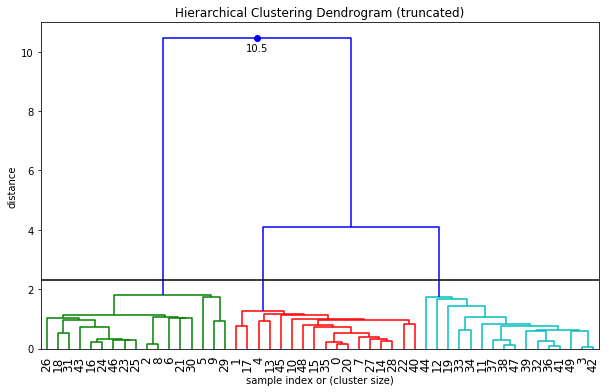

In [29]:
distance_thr(Z,2.3,p=len(Z)+1)

In [32]:
# inconsistance
from scipy.cluster.hierarchy import inconsistent
depth = 2
Z = linkage(X, 'single')
incons = inconsistent(Z, depth)
import pandas as pd
pd.DataFrame(incons).iloc[40:,:]

,0,1,2,3
40,1.078389,0.122364,3.0,0.796846
41,1.071071,0.273929,3.0,0.752157
42,1.249718,0.256772,2.0,0.707107
43,1.553436,0.172751,2.0,0.707107
44,1.708722,0.046856,2.0,0.707107
45,1.333288,0.589399,2.0,0.707107
46,1.552820,0.377110,3.0,0.630027
47,2.365831,1.501333,3.0,1.140786
48,5.444662,4.495784,3.0,1.116687


In [30]:
from scipy.cluster.hierarchy import fcluster
fcluster(Z,depth=2,t=1.14)

array([2, 2, 1, 3, 2, 1, 1, 2, 1, 1, 2, 3, 3, 2, 2, 2, 1, 2, 1, 3, 2, 1, 2,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 1, 3, 2,
       1, 3, 2, 3], dtype=int32)

## Kmeans

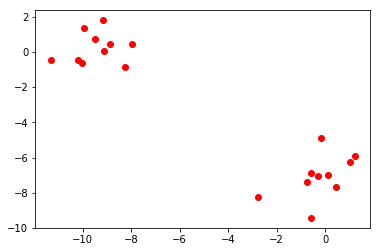

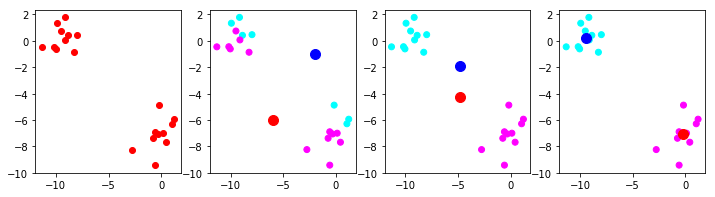

In [33]:
X, y = make_blobs(n_features=2, centers=2,n_samples=20,random_state=9)
plt.scatter(X[:,0],X[:,1],c="r")
plt.show()
cent=np.asarray([[-6,-6],[-2,-1]])
plt.figure(figsize=(12,3))
plt.subplot(1,4,1)
plt.scatter(X[:,0],X[:,1],c="r")
for i in range(3):
    plt.subplot(1,4,i+2)
    y_t=np.sum((X-cent[0,:])**2,axis=1)**0.5<np.sum((X-cent[1,:])**2,axis=1)**0.5
    plt.scatter(X[:,0],X[:,1],c=y_t,cmap=plt.cm.cool)
    plt.scatter(cent[0,0],cent[0,1],c="r",s=100)
    plt.scatter(cent[1,0],cent[1,1],c="b",s=100)

    cent=np.asarray([[np.sum(X[:,0]*y_t)/(np.sum(y_t)),np.sum(X[:,1]*y_t)/np.sum(y_t)],
            [np.sum(X[:,0]*(1-y_t))/np.sum(1-y_t),np.sum(X[:,1]*(1-y_t))/np.sum(1-y_t)]])
plt.show()

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [44]:
#Use package from sklearn.
from sklearn.cluster import KMeans

n=2 # number of clusters
dd=X #data
tar=y # real target

#train the model.
km=KMeans(random_state=324,n_clusters=n)
res=km.fit(dd)
#result.
print(res.labels_)
# print res.predict(dd)

[0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0]


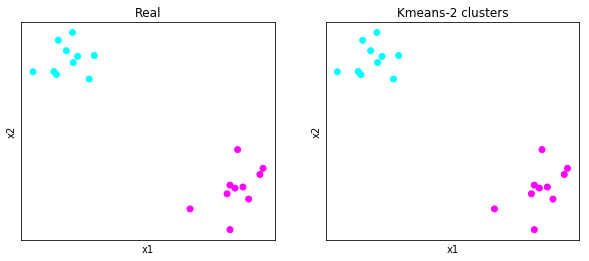

In [46]:
#Plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)

plt.scatter(dd[:, 0], dd[:, 1], c=tar, cmap=plt.cm.cool)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.title("Real")

plt.subplot(1,2,2)
plt.scatter(dd[:, 0], dd[:, 1], c=res.labels_, cmap=plt.cm.cool)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-{} clusters".format(n))
plt.show()

### Practice 3.  Using 311 complaints data set to cluster NYC census tract areas. And try to explain your results and performance of clustering. 

### Clustering Performance Evaluation:

Please carefully read 2.3.9:
http://scikit-learn.org/stable/modules/clustering.html


In [48]:
data311=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/Cluster_lecture/cluster.csv")

In [49]:
data311.head()

,geoid,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,...,VACANT APARTMENT,Vacant Lot,Vending,Violation of Park Rules,WATER LEAK,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
0,36061007700,4,0,32,1,0,2,5,1,0,...,0,0,3,2,7,0,3,49,0,0
1,36081054200,1,0,0,7,0,0,0,0,0,...,0,5,0,0,8,2,0,34,0,0
2,36047003500,2,0,2,1,0,0,1,0,0,...,0,6,1,0,9,2,0,22,0,0
3,36047025000,2,0,1,5,0,0,0,0,0,...,0,0,0,0,0,3,2,14,0,0
4,36081036100,10,0,1,5,0,0,0,0,0,...,0,1,0,0,11,1,0,8,0,0


In [66]:
from sklearn import preprocessing

In [65]:
print "result_example for visulization:"
res_exp=[[36061007700,3],[36081054200, 0],[36047003500,3]]
res_exp=pd.DataFrame(res_exp)
res_exp.columns=["geoid",0]
print res_exp

result_example for visulization:
         geoid  0
0  36061007700  3
1  36081054200  0
2  36047003500  3


### (1) Preprocessing the 311 data. Cross-sectional normalization. (Important!! Why?)

### (2) Try different clustering algorithms for different number of clusters.

### (3) Choose one metric to quantify your model performance. And it could be also used for choosing number of clusters but you need to make sure to use a Validation set for this process.

### (4) Visulize your clustering result on the NYC shapefile. 

###  For visulization

pip install pyshp

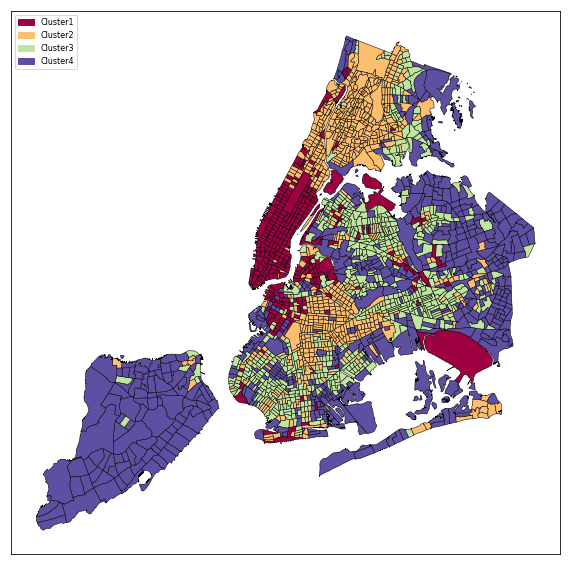

In [216]:
visulization(result=ress)

In [215]:
def visulization(result):

    import shapefile
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    from matplotlib.patches import Polygon
    from matplotlib.collections import PatchCollection
    %matplotlib inline
    #   -- input --
    Boston_geoid=list(data311.geoid.unique())
    sf = shapefile.Reader("nyct2010_16b/nyct2010.shp")
    recs    = sf.records()
    test=pd.DataFrame(recs)
    test.loc[:,'county']=0
    test.loc[test.iloc[:,2]=="Staten Island","county"]="085"
    test.loc[test.iloc[:,2]=="Manhattan","county"]="061"
    test.loc[test.iloc[:,2]=="Brooklyn","county"]="047"
    test.loc[test.iloc[:,2]=="Bronx","county"]="005"
    test.loc[test.iloc[:,2]=="Queens","county"]="081"
    test.loc[:,"geoid"]=0
    test.loc[:,"geoid"]="36"+test.county+test.iloc[:,3].apply(str)

    shapes  = sf.shapes()
    Nshp    = len(shapes)
    cns     = []
    for nshp in xrange(Nshp):
        cns.append(recs[nshp][1])
    cns = np.array(cns)

    cmap = plt.cm.Spectral(np.linspace(0,1,max(result.iloc[:,-1])+1))

    fig=plt.figure(figsize = (10,10)) 
    fig.add_subplot(111)
    ax = fig.gca() 
    for nshp in xrange(Nshp):
        if int(test.iloc[nshp,-1]) in Boston_geoid:
            k=result[result.geoid==int(test.iloc[nshp,-1])].iloc[0,-1]
            c=cmap[k][0:3]  
            ptchs   = []
            pts     = np.array(shapes[nshp].points)
            prt     = shapes[nshp].parts
            par     = list(prt) + [pts.shape[0]]
            for pij in xrange(len(prt)):
                ptchs.append(Polygon(pts[par[pij]:par[pij+1]]))
            ax.add_collection(PatchCollection(ptchs,facecolor=c,edgecolor='k', linewidths=.5))
        ax.axis('scaled')
    #ax.set_title("NYC Clustering based on 311 service request data")

    import matplotlib.patches as mpatches
    clum_num=len(result.iloc[:,-1].unique())

    handles=[]
    for t in range(clum_num):
        locals()["patch_{}".format(t)] = mpatches.Patch(color=cmap[t][0:3] , label='Cluster'+str(t+1))
        handles.append(locals()["patch_{}".format(t)])
    #plt.axis('off')
    plt.xticks([], [])
    plt.yticks([],[])
    plt.legend(handles=handles,loc='upper left',prop={'size':8})

Refference: 

311 Project: (Lingjing Wang, Cheng Qian, Constantine Kontokosta, Stanislav Sobolevsky)

https://arxiv.org/pdf/1611.06660.pdf

## Leader Clustering 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.leaders.html#scipy.cluster.hierarchy.leaders